In [6]:
## Working with the dataset as a node graph instead the typical dataframe way

import json
import networkx as nx
from networkx.readwrite import json_graph
import networkx as nx
import matplotlib.pyplot as plt

# Specify the encoding parameter when opening the file
with open('../dataset/MC1.json', encoding='utf-8') as f:
    data = json.load(f)

graph = nx.node_link_graph(data)

# Convert the graph to JSON data with UTF-8 encoding
json_data = json_graph.node_link_data(graph)


In [3]:

# Remove duplicate edges by converting the graph to a MultiGraph
multi_graph = nx.MultiGraph(graph)

# Convert the MultiGraph to a standard graph
graph_without_duplicates = nx.Graph(multi_graph)

# Convert the graph to JSON data
json_data = json_graph.node_link_data(graph_without_duplicates)


In [4]:

# Save the JSON data to a file with UTF-8 encoding
with open('exported_graph.json', 'w', encoding='utf-8') as json_file:
    json.dump(json_data, json_file, ensure_ascii=False, indent=4)

The positions of nodes and edges in the visualization are determined automatically using the Fruchterman-Reingold force-directed algorithm, known as "spring layout" in NetworkX. This algorithm simulates a physics-like system where nodes act like particles connected by springs.This approach is akin to a SpringLayout, organizing elements based on specific constraints. Using Circular graph we could reduce the rendering time significant. (11 sec for 500)


NameError: name 'plt' is not defined

C:\Users\gddah\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
C:\Users\gddah\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 152 (\x98) missing from current font.
  func(*args, **kwargs)
C:\Users\gddah\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 153 (\x99) missing from current font.
  func(*args, **kwargs)
C:\Users\gddah\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 156 (\x9c) missing from current font.
  func(*args, **kwargs)
C:\Users\gddah\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gddah\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 152 (\x98) mis

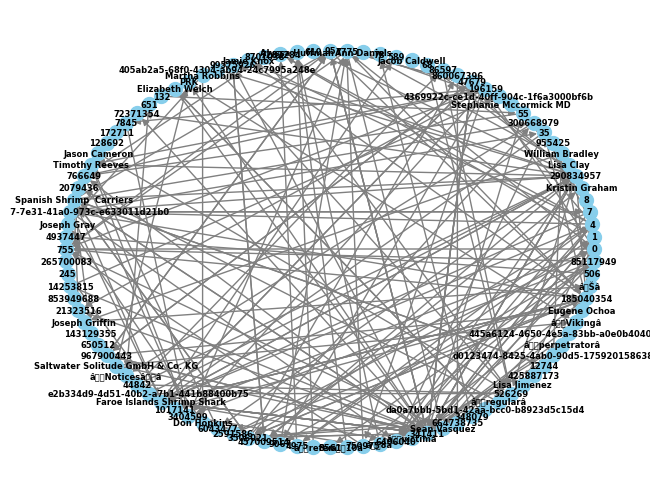

In [5]:
# Subset the data (for example, display only the first 100 nodes)
subgraph = graph.subgraph(list(graph.nodes)[:100])

# Visualization using a different layout (circular)
pos = nx.circular_layout(subgraph)

nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=6, font_color='black', font_weight='bold', edge_color='gray')
plt.show()

Kamadi kawai: another layout alternative

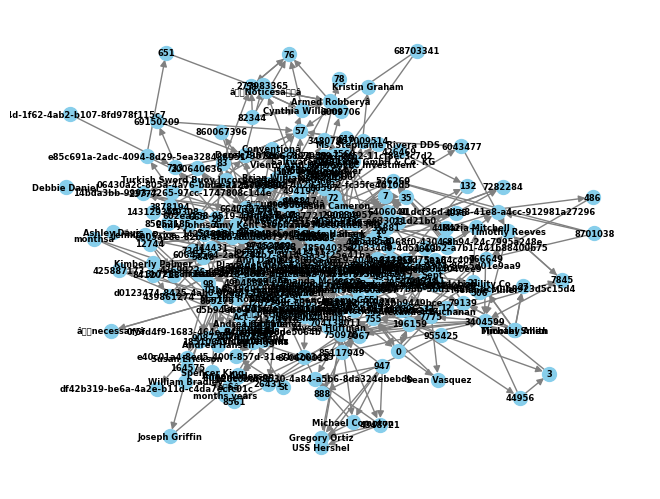

In [ ]:
import matplotlib.pyplot as plt

# Subset the data (for example, display only the first 100 nodes)
subgraph = graph.subgraph(list(graph.nodes)[:300])

# Visualization using a different layout (circular)
pos = nx.kamada_kawai_layout(subgraph)

nx.draw(subgraph, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=6, font_color='black', font_weight='bold', edge_color='gray')
plt.show()

By introducing to only showing weight by a threshold we could reduce the rendering alot!

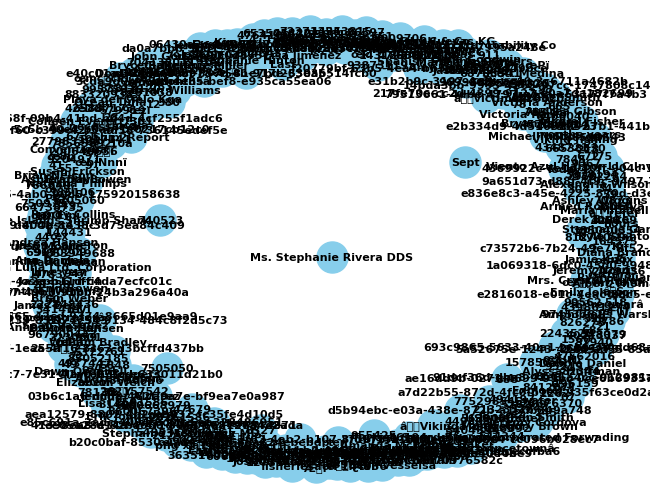

In [ ]:
import matplotlib.pyplot as plt

# Subset the data (for example, display only the first 100 nodes)
subgraph = graph.subgraph(list(graph.nodes)[:500])

# Reduce the number of displayed edges (for example, display only edges with weight greater than a threshold)
threshold = 0.5

# filter out all edges above threshold 
long_edges = list(filter(lambda x: x[2] > threshold, (x for x in subgraph.edges.data('weight'))))

subgraph_with_edges = subgraph.edge_subgraph(long_edges)

# Visualization
pos = nx.spring_layout(subgraph_with_edges)  # Use a different layout if needed
nx.draw(subgraph_with_edges, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_color='black', font_weight='bold', edge_color='gray')
plt.show()


KeyError: 'start_node'